# Anàlisi general de la xarxa

Carreguem les llibreries.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime

Carreguem el graf dels nodes representants d'Espanya.

In [2]:
start = time.time()

G = nx.read_graphml("graphml/8m_k1_spain_coms.graphml")

end = time.time()
print(end - start)

14.463824987411499


Comprovem:

In [3]:
print(nx.number_of_nodes(G))
print(nx.number_of_edges(G))

124434
232118


### Distribució dels graus:

Primer observem el gràfic.

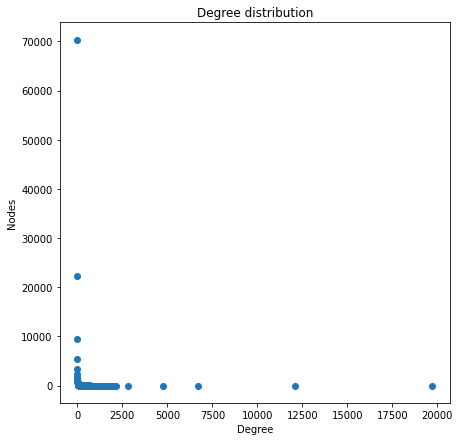

In [4]:
# Obtenim els graus
lista_grados_in = [d for n, d in G.degree(weight='weight')]

# Els veiem en un scatter plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()
ax.scatter(*np.unique(lista_grados_in, return_counts=True))
ax.set_title("Degree distribution")
ax.set_xlabel("Degree")
ax.set_ylabel("Nodes")

plt.show()

Calculem i veiem el top 5 nodes amb major grau.

In [5]:
sorted(list(G.degree(weight='weight')), key=lambda node: node[1], reverse=True)[0:10]

[('IgualdadGob', 19722.0),
 ('IreneMontero', 12101.0),
 ('vitoquiles', 6712.0),
 ('MarDGamero', 4776.0),
 ('PSOE', 2812.0),
 ('CristinaSegui_', 2140.0),
 ('ElHuffPost', 1983.0),
 ('sanchezcastejon', 1873.0),
 ('R3B3L24', 1793.0),
 ('RozalenMusic', 1791.0)]

Calculem mesures bàsiques sobre graus d'entrada i sortida.

Definim una funció per obtenir la informació bàsica.

In [6]:
def print_basic_info_degrees(list_degrees):
    print(sorted(list_degrees, key=lambda node: node[1], reverse=True)[0:5])
    
    # Obtenim una llista amb sols els graus
    degree_sequence = [d for n, d in list_degrees]
    
    print("Màxim:",max(list_degrees, key=lambda nodo: nodo[1]))
    print("Minim:",min(list_degrees, key=lambda nodo: nodo[1]))
    print("Mitjana:",np.mean(degree_sequence))
    print("Mediana:",np.median(degree_sequence))
    print("Desviació típica:",np.std(degree_sequence))

Grau d'entrada:

In [7]:
print_basic_info_degrees(G.in_degree(weight='weight'))

[('IgualdadGob', 19715.0), ('IreneMontero', 12100.0), ('vitoquiles', 6703.0), ('MarDGamero', 4774.0), ('PSOE', 2790.0)]
Màxim: ('IgualdadGob', 19715.0)
Minim: ('LeoLuchadora', 0)
Mitjana: 2.158574023176945
Mediana: 0.0
Desviació típica: 73.7591431487903


Grau de sortida:

In [8]:
print_basic_info_degrees(G.out_degree(weight='weight'))

[('Unomas44284474', 667.0), ('lari_poppins', 311.0), ('Mezzoforte111', 297.0), ('EvaRodr81477644', 250.0), ('MARIAJE77', 198.0)]
Màxim: ('Unomas44284474', 667.0)
Minim: ('ArchMunBurgos', 0)
Mitjana: 2.158574023176945
Mediana: 1.0
Desviació típica: 4.743946766037601


Calculem els hubs i autoritats.

Hubs:

In [9]:
list(sorted(nx.hits(G)[0].items(), key=lambda node: node[1], reverse=True))[0:5]

C:\Users\Casa\anaconda3\envs\TFM_8m\lib\site-packages\networkx\algorithms\link_analysis\hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


[('Unomas44284474', 0.010767399352510174),
 ('ciudadanodepie', 0.0031382040413440405),
 ('SilviaSuperred', 0.0025548043514916716),
 ('milamilena17', 0.001966141664272894),
 ('marisamblazkez', 0.0016054258412050693)]

In [10]:
list(sorted(nx.hits(G)[1].items(), key=lambda node: node[1], reverse=True))[0:5]

[('PSOE', 0.15462571457066293),
 ('IgualdadGob', 0.07567967649965694),
 ('PODEMOS', 0.07298266428281004),
 ('IreneMontero', 0.06731957819537042),
 ('sanchezcastejon', 0.036662273768091745)]

Calculem la densitat.

In [11]:
nx.density(G)

1.4991123641881605e-05

Calculem les components fortes.

In [12]:
components = sorted(nx.strongly_connected_components(G), key=len, reverse=True)

In [13]:
for c in components[0:5]:
    print(len(c))

4175
22
20
16
15


In [14]:
components[0]

{'vxtorrelodones',
 'silviaFSSCCOO',
 'LuisEscribanoP1',
 'FalqueMonica',
 'aurorab933',
 'RMBM17',
 'El_Plural',
 'feministes_cat',
 'CHAmariahuerva',
 'RcJessbasa03',
 'roderofdez',
 'IndeGranada',
 'Encarnagutoca',
 'CCOOLaRioja',
 'margayakovenko',
 'FVicente_Illust',
 'mjguerrapalmero',
 'MistralS',
 'InmaculadaGlez',
 'Wynonita',
 'psoemelilla',
 'Jonetxuruma',
 'cakealatake',
 'rubenbaston',
 'JSE_Egaz',
 'Marmotarosa1',
 'VOXSevilla_',
 'CrisGaralhe',
 'PodemosCMadrid',
 'psoedeandalucia',
 '1959_karl',
 'LuisVMunoz',
 'miriamrubio2',
 'Eva_Granados',
 'diossandra',
 'desselebrada',
 'Poptvmelilla',
 'IGNSpain',
 'HistoriaNG',
 'RaquelG89858782',
 'RemediosRamos1',
 'karmelejaio',
 'MyInvestorES',
 'ReyesFdez',
 'AseBio',
 'MariCruzCCOO',
 'fundacionupo',
 'AntonioMaestre',
 'Miercoles_00',
 'librerialuces',
 'castrexaradfem',
 'lauragarciagon',
 'GAbolicionista',
 'kamipnasqo',
 'mareablancaLGN',
 'COABurgos',
 'ConsorciZF',
 'bynzelman',
 'DGobiernoCV',
 'UnidasLasRozas',
 'c

Veiem les interaccions entre usuaris que mes es realitzen.

In [15]:
lista_aristas = list(G.edges(data=True))
sorted(lista_aristas, key=lambda node: node[2]['weight'], reverse=True)[0:5]

[('Unomas44284474',
  'PSOE',
  {'weight': 122.0,
   'typeTweet': 'replied_to',
   'date': '2022-03-08T08:25:11.000Z',
   'id': '16279'}),
 ('Unomas44284474',
  'PODEMOS',
  {'weight': 102.0,
   'typeTweet': 'replied_to',
   'date': '2022-03-08T08:22:48.000Z',
   'id': '16277'}),
 ('ciudadanodepie',
  'sanchezcastejon',
  {'weight': 92.0,
   'typeTweet': 'replied_to',
   'date': '2022-03-08T14:47:13.000Z',
   'id': '379918'}),
 ('EvaRodr81477644',
  'europapress',
  {'weight': 52.0,
   'typeTweet': 'replied_to',
   'date': '2022-03-08T13:35:49.000Z',
   'id': '285041'}),
 ('romeljuly',
  'Fabibcd',
  {'weight': 45.0,
   'typeTweet': 'retweeted',
   'date': '2022-03-08T08:57:05.000Z',
   'id': '39702'})]

Comprovem distribució tipus de tweet i frecuencia de publicació amb el temps.

In [16]:
retweetedCount = 0
repliedToCount = 0
quotedCount = 0
originalCount = 0
datesTweets = []

In [17]:
for e in G.edges(data=True):
    if e[2]['typeTweet'] == 'retweeted':
        retweetedCount += 1
    elif e[2]['typeTweet'] == 'replied_to':
        repliedToCount += 1
    elif e[2]['typeTweet'] == 'quoted':
        quotedCount += 1
    elif e[2]['typeTweet'] =='original' :
        originalCount += 1
    # Guardem les dates de publicació per a després veure la frecuecia de publicació 
    datesTweets.append(e[2]['date'])

Comprovem:

In [18]:
print('RT:',retweetedCount)
print('Replied:',repliedToCount)
print('Quoted:',quotedCount)
print('Tweet original:',originalCount)

RT: 151571
Replied: 50631
Quoted: 21010
Tweet original: 8906


Veiem ara la frecuencia de publicacio de tweets durant el dia.

Primer canviem el format de les dates per quedar-nos sols amb les hores.

In [21]:
hours_tweets = []
hours_tweets = [datetime.strftime(datetime.strptime(d,'%Y-%m-%dT%H:%M:%S.000Z'), '%H') for d in datesTweets]
hours_tweets = sorted(hours_tweets)
len(hours_tweets)

232118

Ara obtenim la freqüencia de tweets publicats en cada hora. 

Recorrem cada hora i contem la seua aparició total.

In [22]:
frequency = {}

for hour in hours_tweets:
    if hour in frequency:
        frequency[hour] += 1
    else:
        frequency[hour] = 1

# Comprovem
print(frequency)

{'08': 10071, '09': 11779, '10': 16679, '11': 23183, '12': 22712, '13': 21572, '14': 20489, '15': 12317, '16': 14422, '17': 10457, '18': 13814, '19': 14338, '20': 15199, '21': 16223, '22': 8863}


Dibuixem un gràfic amb aquests valors.

In [23]:
plt.figure(figsize=(9,6))

plt.plot(list(frequency), list(frequency.values()))

plt.ylabel('Nombre de tweets')
plt.xlabel('Hores')
plt.title('Distribució de tweets al llarg del dia')

plt.show()